# Importing Libraries and Reading the Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, roc_auc_score

In [2]:
df = pd.read_csv('winequality-red.csv')

Melihat secara keseluruhan pada 5 baris pertama dengan menggunkan function `head`

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Variables in dataset:
1. fixed acidity: most acids involved with wine or fixed or nonvolatile
2. volatile acidity: the amount of acetic acid in wine
3. citric acid: found in small quantities, citric acid can add 'freshness' and flavor to wines
4. residual sugar: the amount of sugar remaining after fermentation stops
5. chlorides: the amount of salt in the wine
6. free sulfur dioxide: the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion
7. total sulfur dioxide: amount of free and bound forms of S02
8. density: the density of water is close to that of water depending on the percent alcohol and sugar content
9. pH: describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic)
10. sulphates: a wine additive which can contribute to sulfur dioxide gas (S02) levels
11. alcohol: the percent alcohol content of the wine
12. quality: A quality label in the range of 0 (very bad) to 10 (very excellent). It is the median of at least three evaluations made by wine experts.


# Data Preprocessing and Visualization

Memeriksa kolom data dan juga memeriksa type data dari setiap kolom pada data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
df.sample()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
126,8.2,1.33,0.0,1.7,0.081,3.0,12.0,0.9964,3.53,0.49,10.9,5


Melihat berapa banyak kolom dan baris pada data

In [6]:
print("Number of column :", df.shape[1])
print("Number of row :", df.shape[0])

Number of column : 12
Number of row : 1599


Memeriksa data secara keseluruhan dari banyaknya data, rata-rata data (Mean), Standar deviasi data, maksimal dan minimal data, serta Q1 Q2 dan Q3 pada data dengan menggunakan function `describe`

In [7]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Melakukan pemeriksaan pada data, dengan maksud data yang dimilki tidak ada duplikasi atau bisa diartikan setiap data sudah mewakili 1 barang/produk/individu, pada data dengan begitu data bisa diproses ke tahap selanjutnya

In [8]:
#cheking duplicates
df.duplicated().sum()

240

ternyata data yang kita milki memilki duplikasi data sebanyak 240 baris data, maka dari itu langkah selanjutnya adalah kita dapat menghapus data duplikasi

In [9]:
#there is duplicate data in the dataset, for that we do the handling
df.drop_duplicates(inplace=True)

setelah kita melakukan penaganan pada data dengan cara menghapus data duplikasinya maka data terduplikasi akan dihapus dari data

In [10]:
#make sure again for no duplicated data
df.duplicated().sum()
#there is no duplication of data after handling delete duplication

0

Tahap selajutnya kita akan memeriksa apakah data yang kita milki terdapat nilai yang hilang (missing value) atau tidak

In [11]:
# checking missing value 
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [12]:
df.mean()

fixed acidity            8.310596
volatile acidity         0.529478
citric acid              0.272333
residual sugar           2.523400
chlorides                0.088124
free sulfur dioxide     15.893304
total sulfur dioxide    46.825975
density                  0.996709
pH                       3.309787
sulphates                0.658705
alcohol                 10.432315
quality                  5.623252
dtype: float64

In [13]:
df.median()

fixed acidity            7.9000
volatile acidity         0.5200
citric acid              0.2600
residual sugar           2.2000
chlorides                0.0790
free sulfur dioxide     14.0000
total sulfur dioxide    38.0000
density                  0.9967
pH                       3.3100
sulphates                0.6200
alcohol                 10.2000
quality                  6.0000
dtype: float64

In [14]:
#look for the difference between the largest value and the smallest value in the data (range)
Range = df.max() - df.min()
Range

fixed acidity            11.30000
volatile acidity          1.46000
citric acid               1.00000
residual sugar           14.60000
chlorides                 0.59900
free sulfur dioxide      71.00000
total sulfur dioxide    283.00000
density                   0.01362
pH                        1.27000
sulphates                 1.67000
alcohol                   6.50000
quality                   5.00000
dtype: float64

In [15]:
# mengukur seberapa menyebar data yang ada dari mean-nya. 
# Jika nilai variance dari data kita kecil, maka data tersebar dekat nilai mean-nya
# jika nilai variance besar maka menunjukan data tersebar jauh dari mean-nya
df.var()

fixed acidity              3.017134
volatile acidity           0.033500
citric acid                0.038235
residual sugar             1.828752
chlorides                  0.002438
free sulfur dioxide      109.145456
total sulfur dioxide    1116.157653
density                    0.000003
pH                         0.024036
sulphates                  0.029127
alcohol                    1.170866
quality                    0.678281
dtype: float64

Dapat kita kita lihat untuk kolom `free sulfur dioxide` dan kolom `total sulfur dioxide` memiliki score yang besar, itu berarti data dari kolom `free sulfur dioxide` dan `total sulfur dioxide` jauh dari mean-nya

In [16]:
# The standard deviation shows how different the values in the data are from the average, just like the variance. 
# but what distinguishes the standard deviation is very often used in everyday cases
df.std()

fixed acidity            1.736990
volatile acidity         0.183031
citric acid              0.195537
residual sugar           1.352314
chlorides                0.049377
free sulfur dioxide     10.447270
total sulfur dioxide    33.408946
density                  0.001869
pH                       0.155036
sulphates                0.170667
alcohol                  1.082065
quality                  0.823578
dtype: float64

Seperti yang dijelaskan, bahwasaanya Standar deviasi menunjukan sebarapa berbeda nilai pada data dengan rata-ratanya, perhitungannya sama seperti variansi semakin besar nilai pada data maka akan semakin jauh, sebaliknya semakin kecil nilai pada data maka akan semakin dekat dengan rata-ratanya, dapat kita lihat dari output diatas bahwa kolom `free sulfur dioxide` dan `total sulfur dioxide`, yang menujukan nilai yang cukup besar itu berarti menandakan nilai-nilai yang ada pada kolom tersebut jauh dari rata-ratanya 

In [17]:
#membuat fungsi untuk menampilkan visualisasi 
def visual(df, types):
    num = df 
    f = pd.melt(num, value_vars=num)
    g = sns.FacetGrid(f, col="variable", col_wrap=3, sharex=False, sharey=False, size= 7)
    g = g.map(types, "value")
    plt.show()
    return g
import warnings
warnings.filterwarnings("ignore")

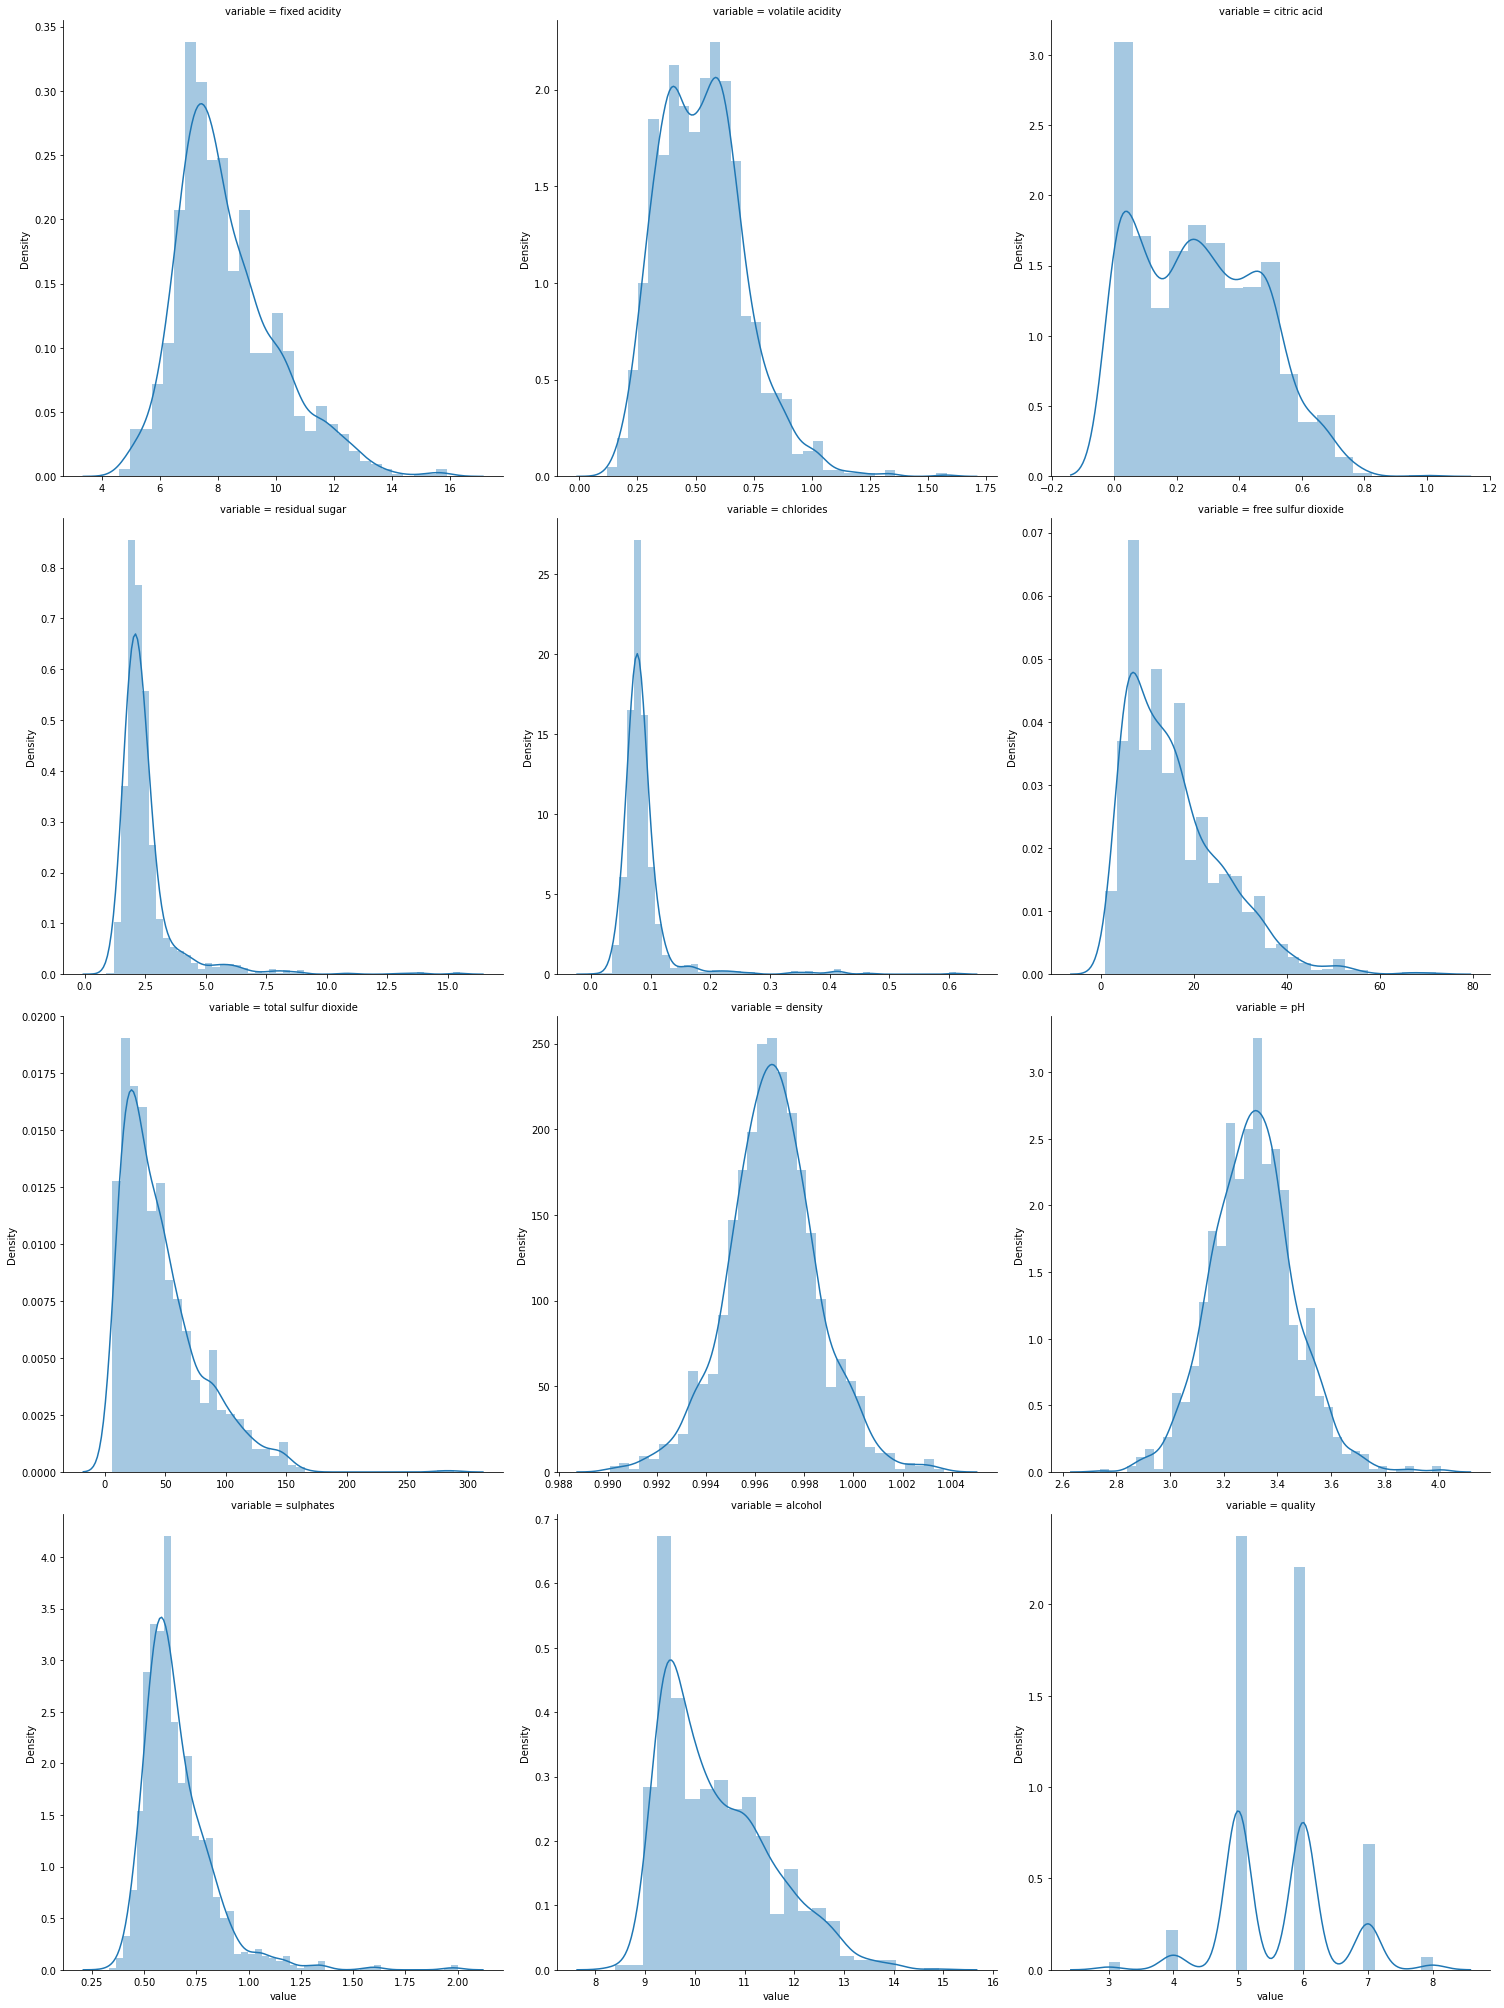

In [18]:
#melakukan check distribusi pada dataset dengan visualisasi
visual(df, sns.distplot)

Dapat kita lihat dari grafik diatas bahwa banyak sekali kolom yang memilki Skewness dengan ekor distribusi positif dimulai dari kolom `chlorides`,`residual sugar`, `sulphates`, `total sulfur dioxide`, `free sulfur dioxide` hal ini mengindikasikan bahwa setiap kolom tersebut memilki nilai outlier, yang mana nilai dari data tersebut lebih besar dari meannya

In [19]:
skewness_report = df.skew().reset_index()
skewness_report.columns = ['Columns', 'Score Skewness']
skewness_report.sort_values('Score Skewness',ascending= False)

,Columns,Score Skewness
4,chlorides,5.502487
3,residual sugar,4.548153
9,sulphates,2.406505
6,total sulfur dioxide,1.540368
5,free sulfur dioxide,1.226579
0,fixed acidity,0.941041
10,alcohol,0.859841
1,volatile acidity,0.729279
2,citric acid,0.312726
8,pH,0.232032


Untuk lebih jelasnya apakah setiap kolom memilki skewness apa tidak, dapat dilihat dari report skewness diatas dari kolom score skewness, dengan nilai score skewness yang didapat apabila skewness bernilai 0 maka data tersebut terdistribusi dengan normal, namun apabila lebih dari 0 maka kemungkinan besar data tersebut tidak terdistribusi dengan normal. Untuk itu kita lihat di kolom `chlorides`, `residual sugar`, `sulphates`, `total sulfur dioxide`, `free sulfur dioxide` yang memiliki score skewness lebih dari 0 maka dari itu kolom tersebut dipastikan memiliki skewness (Skewness Positif)

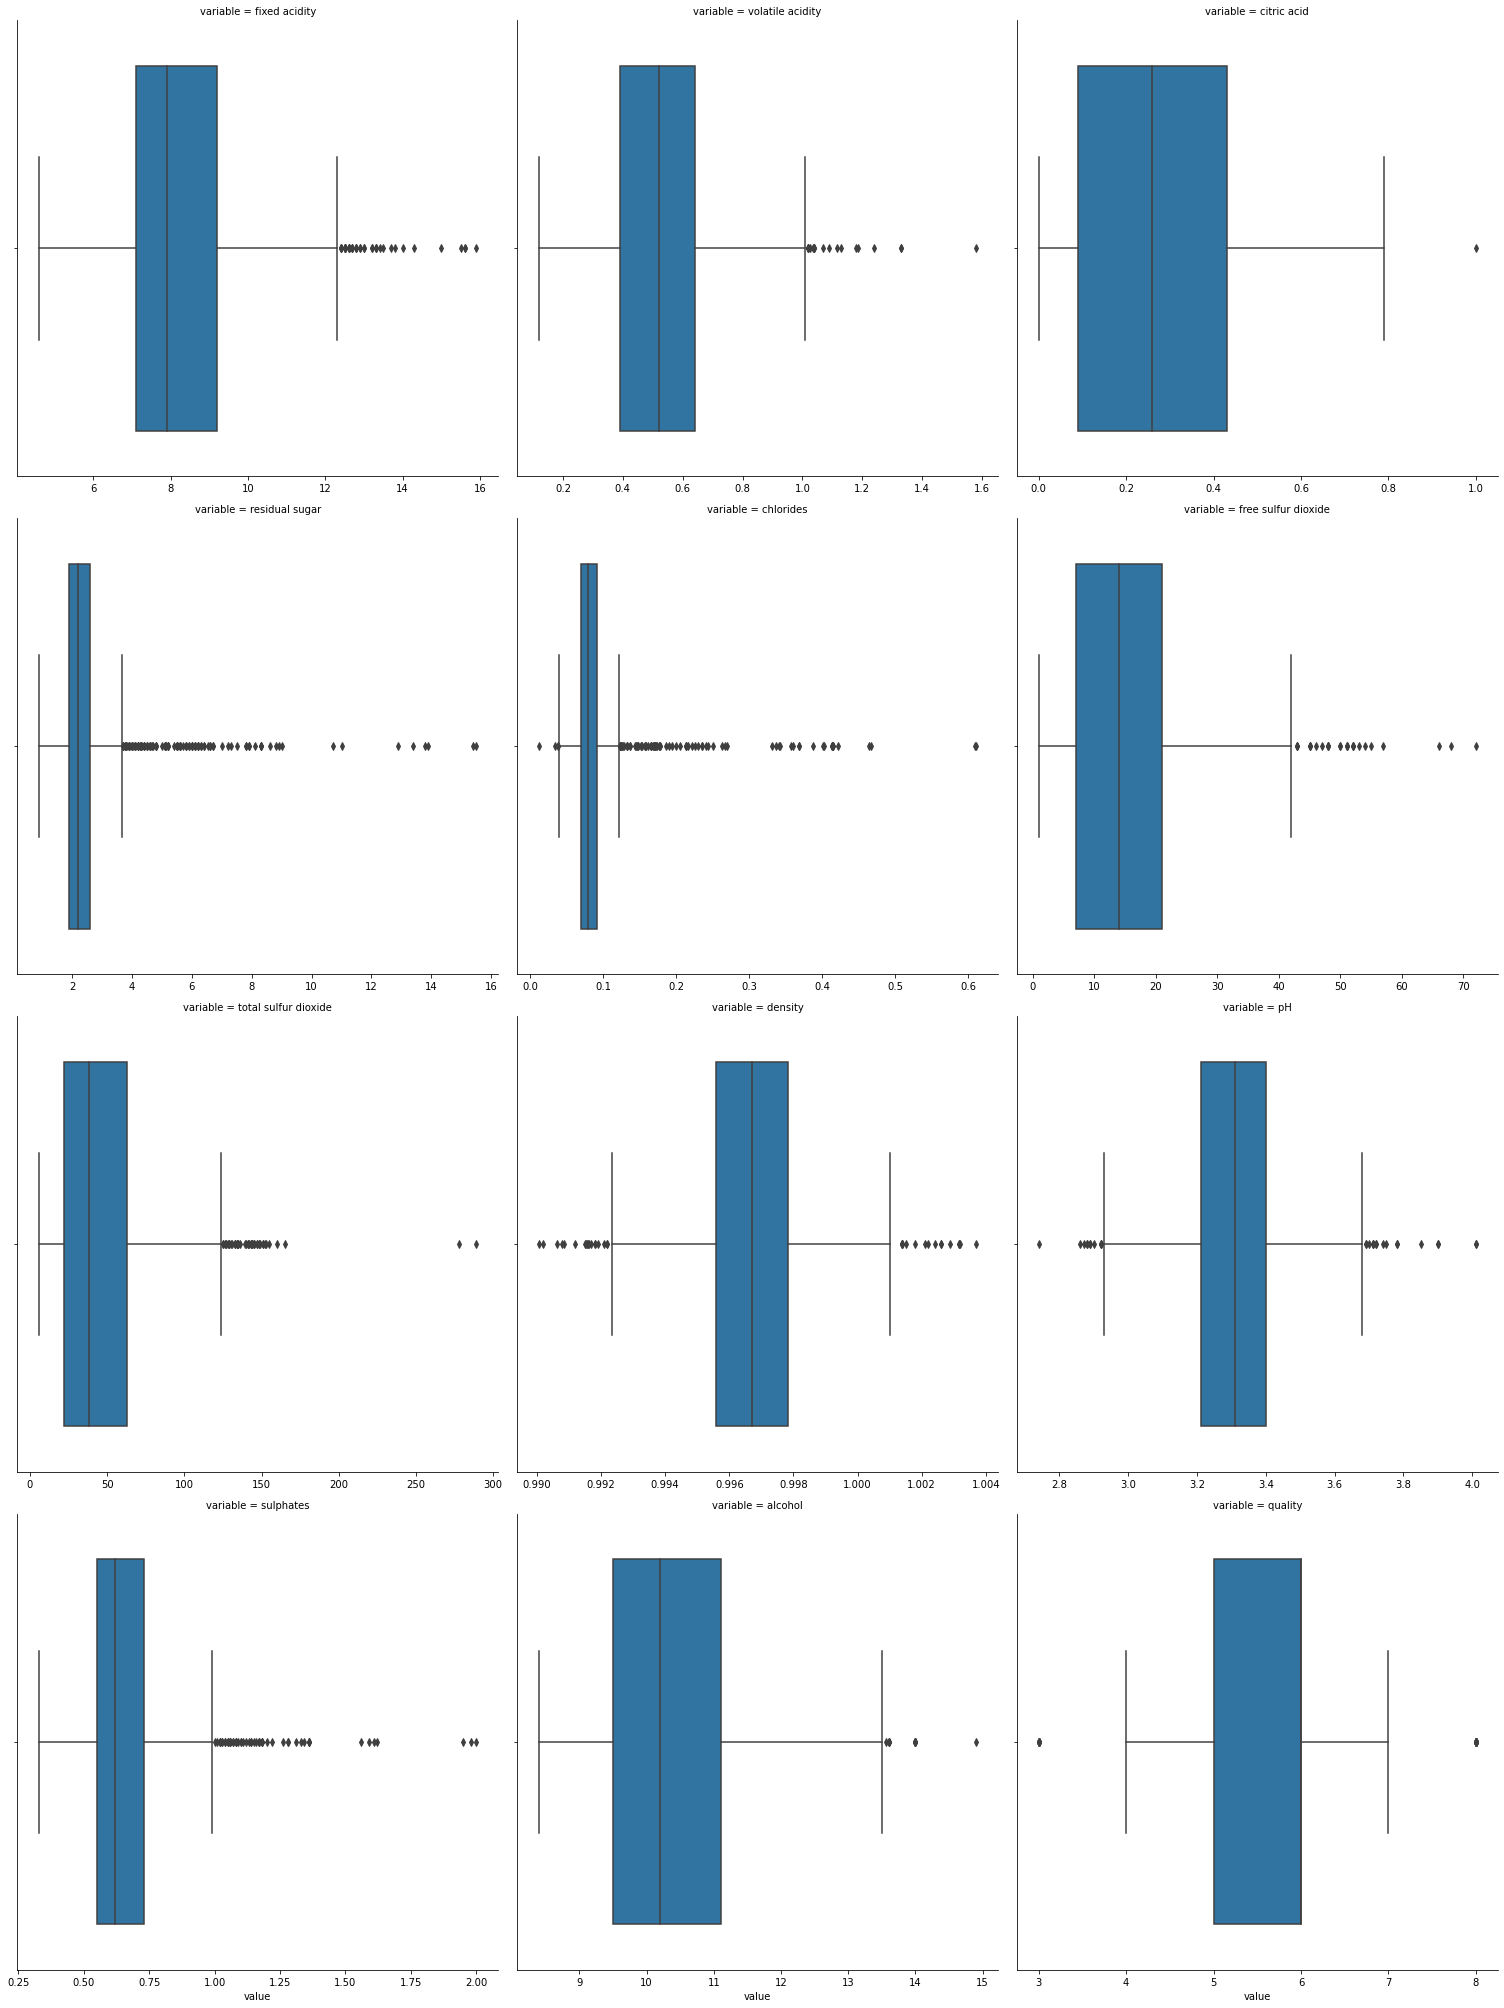

In [20]:
# melakukan check IQR (Interquartile Range) dengan visialisasi
# dan melakukan check apakah terdapat ouliers pada setiap variabel 
visual(df, sns.boxplot)

Dapat kita lihat bahwa pada dataset yang kita punya, memiliki outliers disetiap masing-masing kolom, maka dari itu pada saat kita ingin membuat model machine learning, nantinya kita perlu penanganan lebih lanjut agar model mesin learning yang kita buat memiliki tingkat akurasi yang bagus, pada tahap prepocessing nantinya kita perlu tangani outliers tersebut dengan metode standarisasi.

In [21]:
# membuat report outliers menggunakan fungsi 
def outliers(s):
    iqr = (np.quantile(s, 0.75)) - (np.quantile(s, 0.25))
    batas_atas = np.quantile(s, .75) + (1.5 * iqr)
    batas_bawah = np.quantile(s, .25) + (1.5 * iqr) 
    f = []
    for i in s:
        if i > batas_atas:
            f.append(i)
        elif i < batas_bawah:
            f.append(i)
    Sum = len(f)
    percent = len(f)/ len(s)*100
    report = {'IQR' : iqr,'Batas Atas' : batas_atas,
              'Batas Bawah' : batas_bawah, 'Sum Outliers' : Sum,
              'Persentase Outliers' : percent}
    report = pd.DataFrame(report.items(), columns= ['SUB', 'Value'])
    return report

Untuk lebih jelasnya tentang outliers yang kita miliki, perlu ditampilkan report dari setiap kolom pada dataset gara kita dapat mengetahui seberapa banyak data yang memiliki outliers dan berapa persentase outliers yang kita punya pada setiap kolom, serta dalam report ini kita dapat melihat berapa IQR yang kita miliki dan juga batas atas serta batas bawahnya. 

In [22]:
for i in df:
    print(i, '\n', display(outliers(df[i])))

,SUB,Value
0,IQR,2.100000
1,Batas Atas,12.350000
2,Batas Bawah,10.250000
3,Sum Outliers,1212.000000
4,Persentase Outliers,89.183223


fixed acidity 
 None


,SUB,Value
0,IQR,0.250000
1,Batas Atas,1.015000
2,Batas Bawah,0.765000
3,Sum Outliers,1245.000000
4,Persentase Outliers,91.611479


volatile acidity 
 None


,SUB,Value
0,IQR,0.340000
1,Batas Atas,0.940000
2,Batas Bawah,0.600000
3,Sum Outliers,1286.000000
4,Persentase Outliers,94.628403


citric acid 
 None


,SUB,Value
0,IQR,0.700000
1,Batas Atas,3.650000
2,Batas Bawah,2.950000
3,Sum Outliers,1280.000000
4,Persentase Outliers,94.186902


residual sugar 
 None


,SUB,Value
0,IQR,0.02100
1,Batas Atas,0.12250
2,Batas Bawah,0.10150
3,Sum Outliers,1251.00000
4,Persentase Outliers,92.05298


chlorides 
 None


,SUB,Value
0,IQR,14.00000
1,Batas Atas,42.00000
2,Batas Bawah,28.00000
3,Sum Outliers,1194.00000
4,Persentase Outliers,87.85872


free sulfur dioxide 
 None


,SUB,Value
0,IQR,41.000000
1,Batas Atas,124.500000
2,Batas Bawah,83.500000
3,Sum Outliers,1198.000000
4,Persentase Outliers,88.153054


total sulfur dioxide 
 None


,SUB,Value
0,IQR,0.002220
1,Batas Atas,1.001150
2,Batas Bawah,0.998930
3,Sum Outliers,1232.000000
4,Persentase Outliers,90.654893


density 
 None


,SUB,Value
0,IQR,0.190000
1,Batas Atas,3.685000
2,Batas Bawah,3.495000
3,Sum Outliers,1220.000000
4,Persentase Outliers,89.771891


pH 
 None


,SUB,Value
0,IQR,0.180000
1,Batas Atas,1.000000
2,Batas Bawah,0.820000
3,Sum Outliers,1232.000000
4,Persentase Outliers,90.654893


sulphates 
 None


,SUB,Value
0,IQR,1.600000
1,Batas Atas,13.500000
2,Batas Bawah,11.900000
3,Sum Outliers,1208.000000
4,Persentase Outliers,88.888889


alcohol 
 None


,SUB,Value
0,IQR,1.000000
1,Batas Atas,7.500000
2,Batas Bawah,6.500000
3,Sum Outliers,1192.000000
4,Persentase Outliers,87.711553


quality 
 None


Dapat kita lihat bahwa pada setiap kolom pada dataset kita milki, terdapat banyak sekali outliersnya bahkan persentase dari ouliersnya semua kolomnya diatas `80%`, maka dari itu nantinya pada saat kita membuata model mesin learning nantinya kita harus lakukan metode standarisasi atau bisa kita hapus oliers tersebut dengan cara dibawah ini. 

selanjutnya tahapan Kurtosis, kurtosis adalah indikator untuk menunjukan derajat keruncingan, semakin besar nilai kurtosis maka kurva semakin runcing. Nilai referensi kurtosis adalah 3.

In [23]:
kurtosis_report = df.kurtosis().reset_index()
kurtosis_report.columns = ['Columns', 'Score_Kurtosis']
kurtosis_report.sort_values('Score_Kurtosis', ascending= False)

,Columns,Score_Kurtosis
4,chlorides,38.624653
3,residual sugar,29.364592
9,sulphates,11.102282
6,total sulfur dioxide,4.042257
5,free sulfur dioxide,1.892691
1,volatile acidity,1.249243
0,fixed acidity,1.049673
8,pH,0.879790
7,density,0.830659
11,quality,0.340256


dapat kita lihat nilai/score dari data yang kita punya memiliki kurtosis yang jauh dari score 3, Kondisi ideal kortosis adalah saat data terdistribusi normal, yaitu kurtosis bernilai 3. jadi bisa dipastikan bahwa dari data yang kita punya tidak tersebar dengan merata.

### Let's do some plotting to know how the data columns are distributed in the dataset 

selanjutnya kita akan melakukan plotting setiap kolom data yang kita punya terhadap kolom `quality` 

<AxesSubplot:xlabel='quality', ylabel='fixed acidity'>

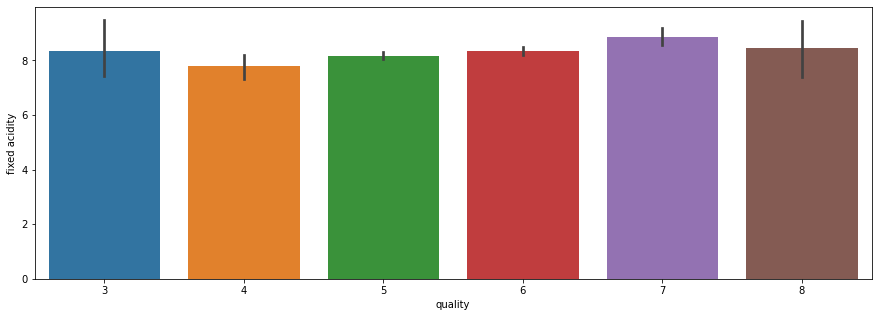

In [24]:
plt.figure(figsize=(15,5))
sns.barplot(x = 'quality', y= 'fixed acidity', data= df)

dari barplot diatas, dapat dilihat bahwa setiap `quality` dari wine terhadap `fixed acidity` tidak memiliki kontribusi yang cukup atau tidak memiliki spesifikasi yang cukup tehadap kulaitas dari wine, maksudnya setiap data dari `fixed acidity` tidak akan berpengaruh terhadap `quality` dari winenya. 

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

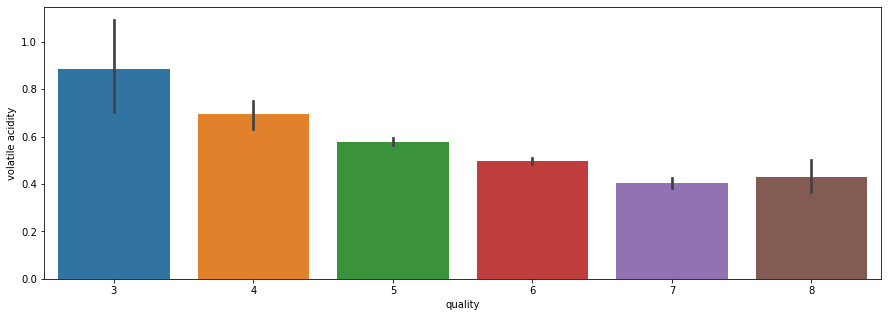

In [25]:
plt.figure(figsize=(15,5))
sns.barplot(x = 'quality', y= 'volatile acidity', data= df)

sedangkan untuk kolom `volatile acidity` memiliki kontribusi yang cukup terhadap `quality` dari wine karna semakin besar nilai dari `volatile acidity` maka kualitas wine akan semakin buruk atau kurang bagus, sebaliknya semakin kecil nilai dari `volatile acidity` akan semakin bagus kualitas dari wine tersebut.

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

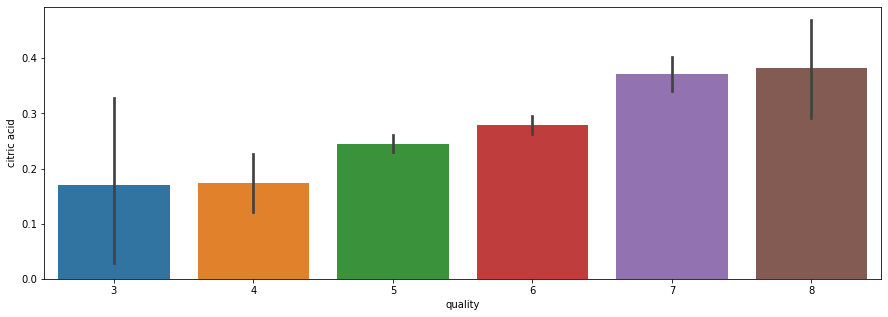

In [26]:
plt.figure(figsize=(15,5))
sns.barplot(x = 'quality', y= 'citric acid', data= df)

untuk kolom dari `citric acid` juga memiliki kontribusi yang cukup terhadap pengkalsifikasian `quality` dari winenya. dapat dilihat dari barplot yang ada, apabila nilai dari `citric acid` tinggi/besar maka kualitas dari winenya akan semakin bagus, sebaliknya semakin kecil/rendahnya `citric acid` maka kualitas dari wine tersebut kurang bagus.  

<AxesSubplot:xlabel='quality', ylabel='residual sugar'>

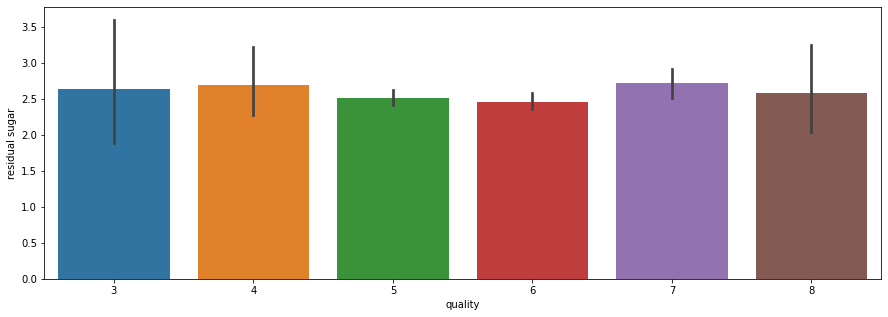

In [27]:
plt.figure(figsize=(15,5))
sns.barplot(x = 'quality', y= 'residual sugar', data= df)

sama halnya dengan kolom `fixed acidity` tidak ada kontibusi yang cukup tehadap `quality` dari wine

<AxesSubplot:xlabel='quality', ylabel='chlorides'>

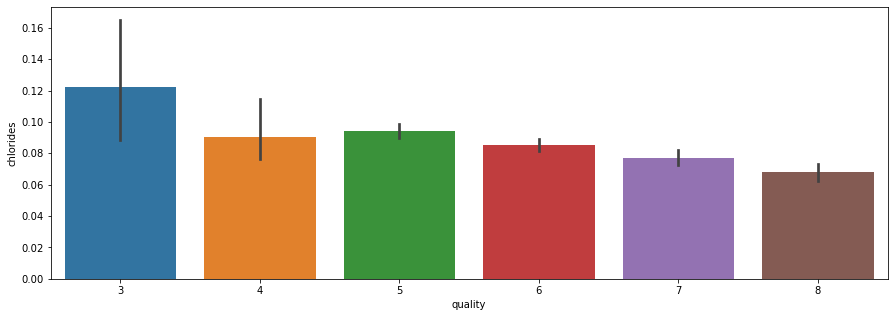

In [28]:
plt.figure(figsize=(15,5))
sns.barplot(x = 'quality', y= 'chlorides', data= df)

untuk kolom `chlorides` memiliki kontribusi yang cukup terhadap `quality` dari wine, apabila nilai dari `chlorides` tinggi atau besar maka kualitas dari wine tersebut kurang bagus, sebaliknya semakin kecil `chlorides` akan semakin bagus kualitasnya.

<AxesSubplot:xlabel='quality', ylabel='free sulfur dioxide'>

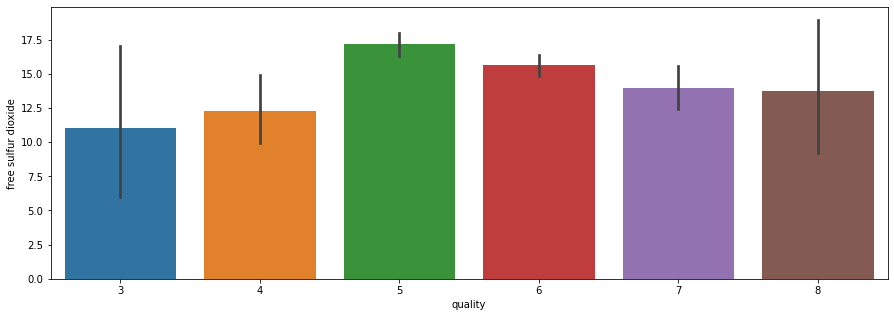

In [29]:
plt.figure(figsize=(15,5))
sns.barplot(x = 'quality', y= 'free sulfur dioxide', data= df)

<AxesSubplot:xlabel='quality', ylabel='total sulfur dioxide'>

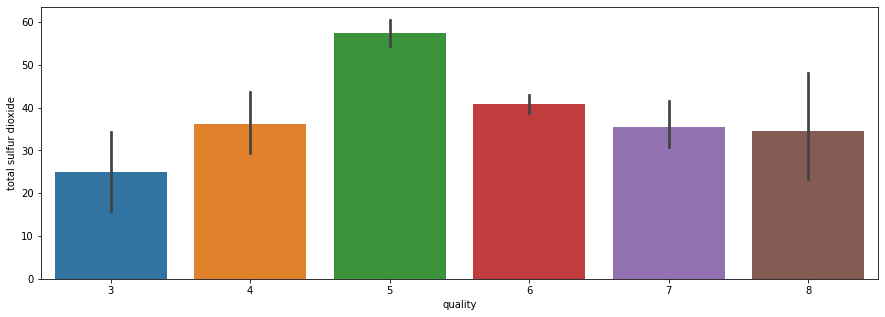

In [30]:
plt.figure(figsize=(15,5))
sns.barplot(x = 'quality', y= 'total sulfur dioxide', data= df)

<AxesSubplot:xlabel='quality', ylabel='density'>

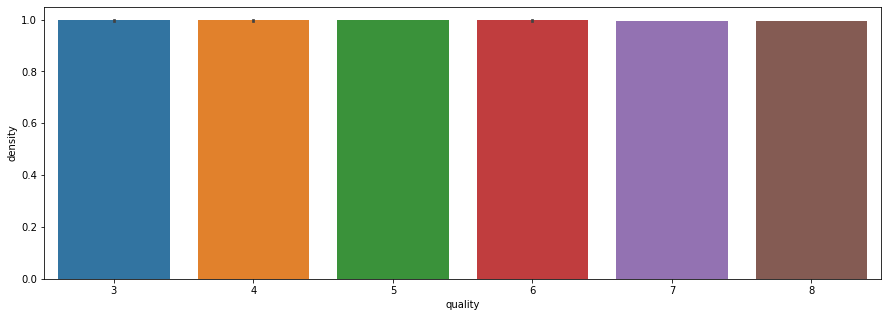

In [31]:
plt.figure(figsize=(15,5))
sns.barplot(x = 'quality', y= 'density', data= df)

<AxesSubplot:xlabel='quality', ylabel='pH'>

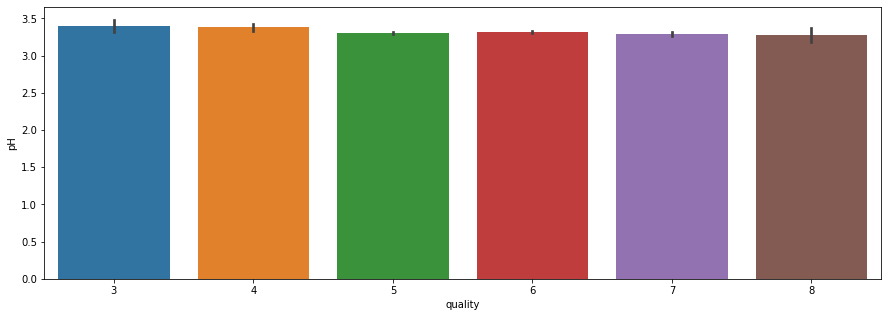

In [32]:
plt.figure(figsize=(15,5))
sns.barplot(x = 'quality', y= 'pH', data= df)

dari ke empat kolom barplot diatas yaitu kolom `ph`, `density`, `total sulfur dioxide`, `free sulfur dioxide` tidak memiliki kontribusi yang cukup terhadap `quality` wine, maka apabila nilai dari keempat kolom tersebut tinggi atau rendah tidak akan berpengaruh terhadapp kualitas dari winenya  

<AxesSubplot:xlabel='quality', ylabel='sulphates'>

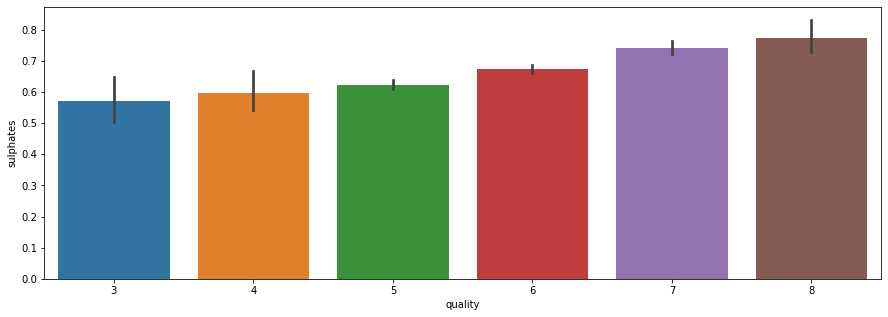

In [33]:
plt.figure(figsize=(15,5))
sns.barplot(x = 'quality', y= 'sulphates', data= df)

untuk kolom `sulphates` cukup berpengaruh terhadap `quality` wine karna semakin besar nilai dari `sulphates` maka akan semakin bagus kualitas dari winenya, sebaliknya apabila nilai `sulphates` kecil/rendah maka akan semakin buruk kualitas wine tersebut

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

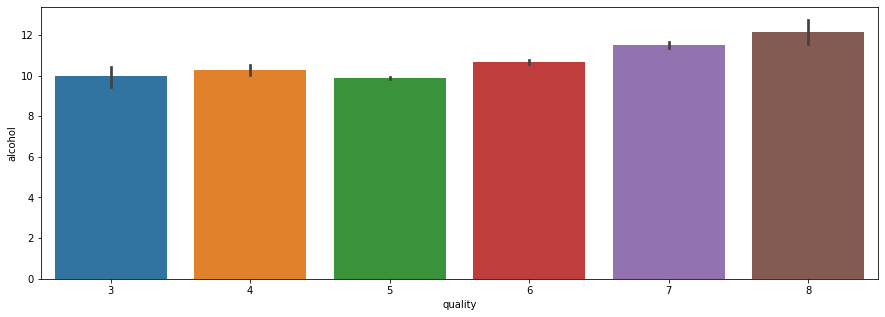

In [34]:
plt.figure(figsize=(15,5))
sns.barplot(x = 'quality', y= 'alcohol', data= df)

sama hal kolom `sulphates`, kolom `alcohol` juga cukup berkontribusi terhadap kolom `quality` wine, karna semakin tinggi nilai dari `alcohol` maka akan semakin bagus kualitas dari wine tersebut.

mencari korelasi dari dataset wine

In [35]:
#membuat fungsi untuk melihat apakah suatu variabel berkorelasi dengan variabel lainnya 
def corelation(df, metode):
    plt.figure(figsize=(20,15))
    triangel = np.triu(np.ones_like(df.corr(method = metode)))
    heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, mask= triangel)
    heatmap.set_title('Corelation Heatmap', pad = 12)
    return heatmap

<AxesSubplot:title={'center':'Corelation Heatmap'}>

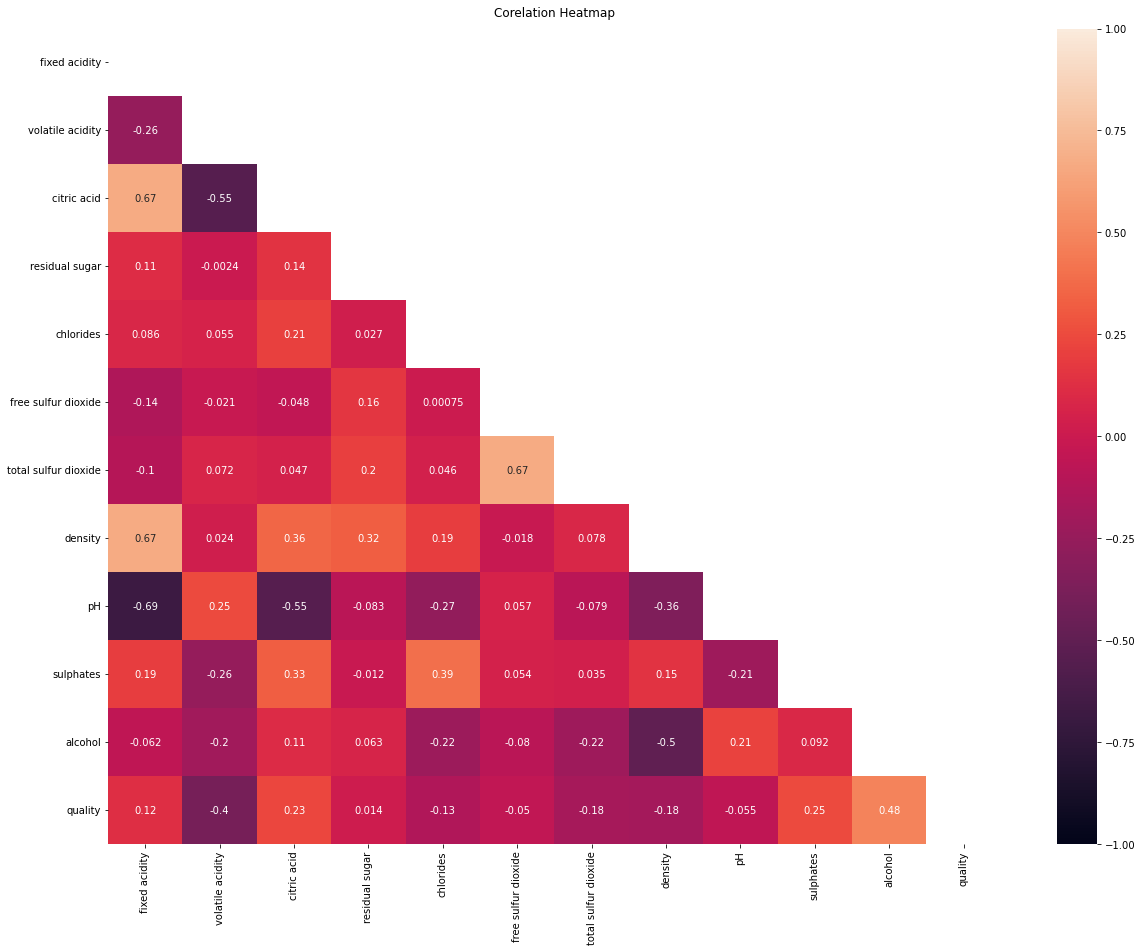

In [36]:
corelation(df, "spearman")

terdapat beberapa kolom yang memiliki nilai korelasi yang tinggi yaitu seperti kolom `density` dengan `fixed acidity`, kolom `total sulfur dioxide` dengan `free sulfur dioxide` dan kolom `citirc acid` dengan `fixed acidity`.

melihat persebaran data dari masing-masing kolom 

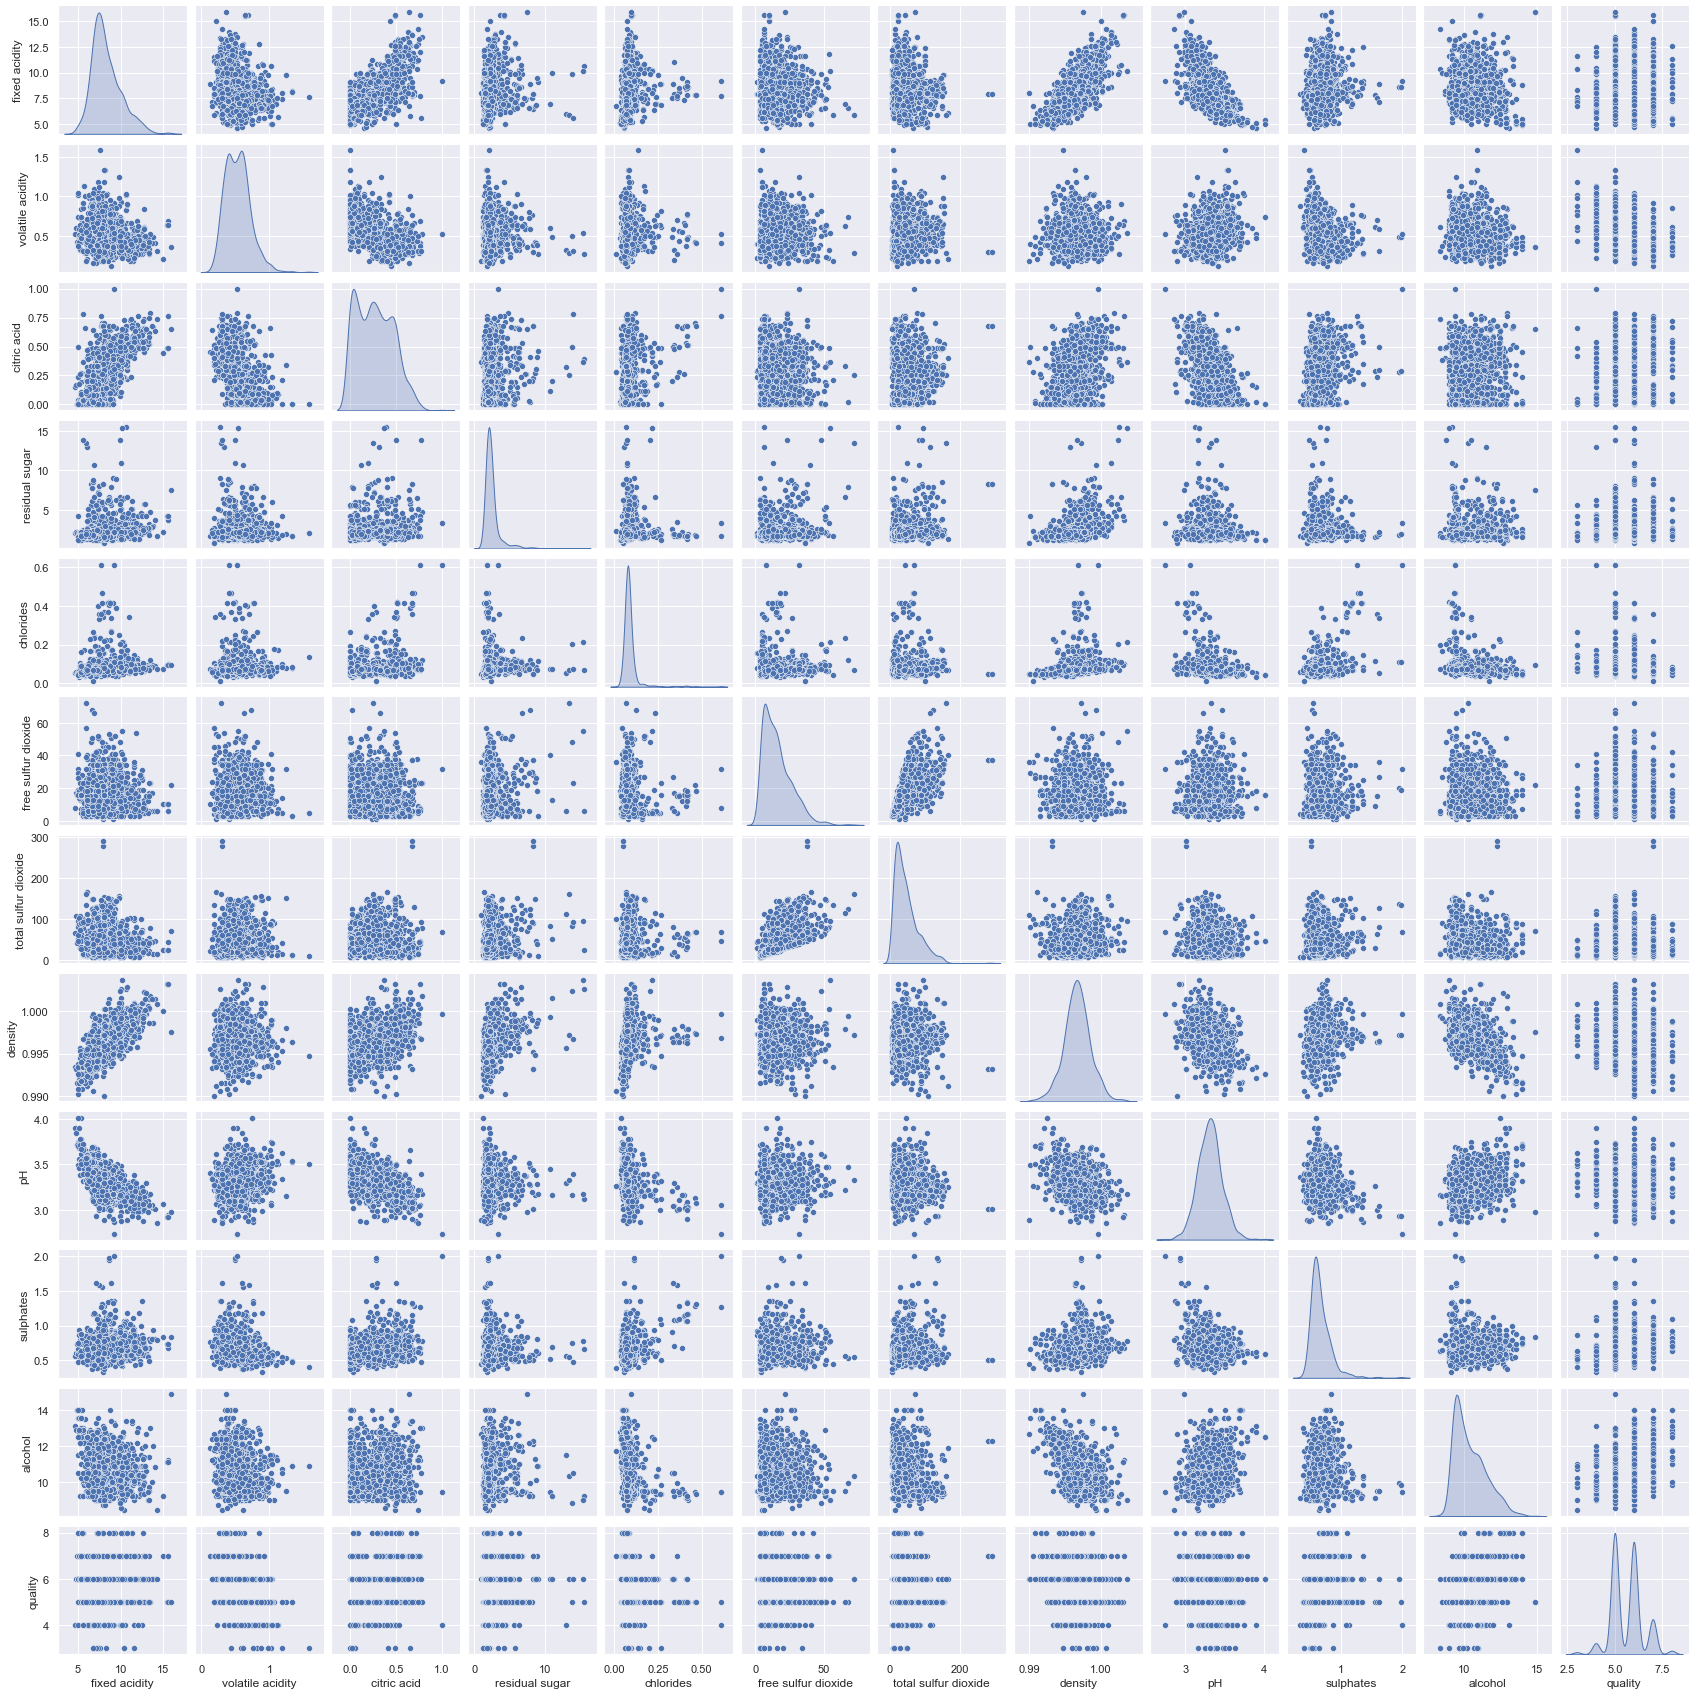

In [37]:
sns.set()
sns.pairplot(df, size= 2, kind= 'scatter', diag_kind= 'kde')
plt.show()

melakukan pengambilan kolom dari salah satu nilai korelasi yang tinggi, Nilai korelasi yang dijadikan patokan sebagai korelasi tinggi tidak pasti, umumnya digunakan angka 0.7.

In [38]:
korelasi_matriks = df.corr().abs()
upper = korelasi_matriks.where(np.triu(np.ones(korelasi_matriks.shape), k=1).astype(np.bool))
drop_upper_korelasi = [column for column in upper.columns if any(upper[column] > 0.8)]
upper

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,NaN,0.255124,0.667437,0.111025,0.085886,0.140580,0.103777,0.670195,0.686685,0.190269,0.061596,0.119024
volatile acidity,NaN,NaN,0.551248,0.002449,0.055154,0.020945,0.071701,0.023943,0.247111,0.256948,0.197812,0.395214
citric acid,NaN,NaN,NaN,0.143892,0.210195,0.048004,0.047358,0.357962,0.550310,0.326062,0.105108,0.228057
residual sugar,NaN,NaN,NaN,NaN,0.026656,0.160527,0.201038,0.324522,0.083143,0.011837,0.063281,0.013640
chlorides,NaN,NaN,NaN,NaN,NaN,0.000749,0.045773,0.193592,0.270893,0.394557,0.223824,0.130988
free sulfur dioxide,NaN,NaN,NaN,NaN,NaN,NaN,0.667246,0.018071,0.056631,0.054126,0.080125,0.050463
total sulfur dioxide,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.078141,0.079257,0.035291,0.217829,0.177855
density,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.355617,0.146036,0.504995,0.184252
pH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.214134,0.213418,0.055245
sulphates,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.091621,0.248835


In [39]:
drop_upper_korelasi

[]

dari korelasi yang didapat ternyata tidak ada kolom yang berkorelasi lebih dari 0,7 maka dari itu tidak ada penghapusan kolom dari dataset yang kita punya

dari dataset yang kita punya memiliki banyak outliers, skewness, kurtosis, dan data yang tidak terdistribusi dengan normal maka kita harus melakukan handling tersebut dengan cara melakukan standarisasi menggunakan standar scaler, dan juga dari label target yang kita miliki ternyata ada imbalance data maka dari itu nantinya kita harus handling imbalance data tersebut dengan over sampling menggunakan `SMOTE`

selanjutnya kita buat variabel baru untuk model yang akan kita buat, untuk variabel X adalah data features dan y adalah labelnya

# Classification Models

In [40]:
X = df.drop('quality', axis=1)
y = df['quality']

### Multiclass Clasification 

melihat pesebaran dari label target kita punya apakah label target yang kita punya imbalanced atau tidak

In [41]:
print('Label Target :', Counter(y))

Label Target : Counter({5: 577, 6: 535, 7: 167, 4: 53, 8: 17, 3: 10})


dapat kita lihat bahwa label target yang kita punya memiliki imbalanced data, maka dari itu nantinya kita akan lakukan penanganan immbalance data ini dengan cara balancing data menggunakan Random Over Sampler

setelah memisahkan data yang kita punya menjadi X dan y kita lakukan split data untuk membuat pemodelannya, dengan menggunakan tarin test split dari sklearn, fungsi dari split data ini adalah untuk membuat train data yang nantinya akan dipelajari oleh machine learning dan test data untuk melakukan prediksi pada data yang sudah dipelajari, dan juga kita akan melakukan balancing data agar nantinya score accuracy dari pemodelan yang kita buat mendapatkan hasil yang bagus

In [42]:
over_sampler = RandomOverSampler(random_state=42)
X_sam, y_samp = over_sampler.fit_resample(X, y)
print('testing target :', Counter(y_samp))

testing target : Counter({5: 577, 6: 577, 7: 577, 4: 577, 8: 577, 3: 577})


In [43]:
X_train, X_test, y_train, y_test = train_test_split(X_sam,y_samp, test_size=0.2, random_state=42)

### Our training and testing data is ready now to perform machine learning algorithm 

ada 5 model machine learning yang akan kita gunakan yaitu `Logistic Regression`, `Random Forest Classifier`, `Super Vector Classifier (SVC)`, `Decision Tree`, `K-NN`

##### Logistic Regression Model 

In [44]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(multi_class='ovr', solver='liblinear', C=4, penalty='l2',fit_intercept=True, max_iter=1200)
lr.fit(X_train, y_train)

predict_lr_train = lr.predict(X_train)
accur_train_lr = accuracy_score(y_train,predict_lr_train)

predict_lr_test = lr.predict(X_test)
accur_test_lr = accuracy_score(y_test,predict_lr_test)

cros_val_lr = cross_val_score(estimator= lr,X=X_train, y=y_train, cv=15)

In [45]:
print("Score Training Accuracy:", accur_train_lr)
print("Score Testing Accuracy:", accur_test_lr)
print("Cross Validation Score:", cros_val_lr.mean())

Score Training Accuracy: 0.5442397977609246
Score Testing Accuracy: 0.56998556998557
Cross Validation Score: 0.542794751273012


In [46]:
print(classification_report(y_test, predict_lr_test))

              precision    recall  f1-score   support

           3       0.73      1.00      0.84       122
           4       0.46      0.43      0.44        98
           5       0.59      0.55      0.57       128
           6       0.41      0.24      0.31       115
           7       0.43      0.37      0.40       120
           8       0.61      0.81      0.70       110

    accuracy                           0.57       693
   macro avg       0.54      0.57      0.54       693
weighted avg       0.54      0.57      0.55       693



##### Random Forest Classifier Model

In [47]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=2000, min_samples_split=2,min_samples_leaf=1,max_features='auto',max_depth=20,bootstrap=False)
rfc.fit(X_train,y_train)

predict_rfc_train = rfc.predict(X_train)
accur_train_rfc = accuracy_score(y_train,predict_rfc_train)

predict_rfc_test = rfc.predict(X_test)
accur_test_rfc = accuracy_score(y_test,predict_rfc_test)

cros_val_rfc = cross_val_score(estimator= rfc,X=X_train, y=y_train, cv=15)

In [48]:
print("Score Training Accuracy:",accur_train_rfc)
print("Score Testing Accuracy:", accur_test_rfc)
print("Cross Validation Score:", cros_val_rfc.mean())

Score Training Accuracy: 1.0
Score Testing Accuracy: 0.8831168831168831
Cross Validation Score: 0.8884155895025462


In [49]:
print(classification_report(y_test, predict_rfc_test))

              precision    recall  f1-score   support

           3       0.99      1.00      1.00       122
           4       0.99      1.00      0.99        98
           5       0.75      0.75      0.75       128
           6       0.67      0.63      0.65       115
           7       0.93      0.94      0.94       120
           8       0.97      1.00      0.99       110

    accuracy                           0.88       693
   macro avg       0.88      0.89      0.89       693
weighted avg       0.88      0.88      0.88       693



##### SVC (linear) 

In [50]:
from sklearn.svm import SVC

svc1 = SVC(kernel='linear')
svc1.fit(X_train, y_train)

predict_svc1_train = svc1.predict(X_train)
accur_train_svc1 = accuracy_score(y_train,predict_svc1_train)

predict_svc1_test = svc1.predict(X_test)
accur_test_svc1 = accuracy_score(y_test,predict_svc1_test)

cros_val_svc_lin = cross_val_score(estimator= svc1,X=X_train, y=y_train, cv=15)

In [51]:
print("Score Training Accuracy:", accur_train_svc1)
print("Score Testing Accuracy:", accur_test_svc1)
print("Cross Validation Score:", cros_val_svc_lin.mean())

Score Training Accuracy: 0.5745756590827014
Score Testing Accuracy: 0.5714285714285714
Cross Validation Score: 0.563740697218958


In [52]:
print(classification_report(y_test, predict_svc1_test))

              precision    recall  f1-score   support

           3       0.69      1.00      0.82       122
           4       0.48      0.49      0.48        98
           5       0.60      0.46      0.52       128
           6       0.44      0.30      0.35       115
           7       0.47      0.42      0.44       120
           8       0.62      0.75      0.68       110

    accuracy                           0.57       693
   macro avg       0.55      0.57      0.55       693
weighted avg       0.55      0.57      0.55       693



##### SVC (rbf) 

In [53]:
svc2 = SVC(kernel = 'rbf', gamma = 'scale', C=5, tol= 0.001)
svc2.fit(X_train, y_train)

predict_svc2_train = svc2.predict(X_train)
accur_train_svc2 = accuracy_score(y_train,predict_svc2_train)

predict_svc2_test = svc2.predict(X_test)
accur_test_svc2 = accuracy_score(y_test,predict_svc2_test)

cros_val_svc_rbf = cross_val_score(estimator= svc2, X=X_train, y=y_train,cv=15)

In [54]:
print("Score Training Accuracy:", accur_train_svc2)
print("Score Testing Accuracy:", accur_test_svc2)
print("Cross Validation Score:", cros_val_svc_rbf.mean())

Score Training Accuracy: 0.48031780426146625
Score Testing Accuracy: 0.46176046176046176
Cross Validation Score: 0.46728946337641986


In [55]:
print(classification_report(y_test, predict_svc2_test))

              precision    recall  f1-score   support

           3       0.61      0.80      0.69       122
           4       0.33      0.42      0.37        98
           5       0.66      0.38      0.48       128
           6       0.25      0.30      0.27       115
           7       0.50      0.19      0.28       120
           8       0.49      0.70      0.58       110

    accuracy                           0.46       693
   macro avg       0.47      0.46      0.44       693
weighted avg       0.48      0.46      0.45       693



##### Decision Tree

In [56]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(splitter='best',max_features='auto',random_state=42,max_leaf_nodes=500)
dtc.fit(X_train, y_train)

predict_dtc_train = dtc.predict(X_train)
accur_train_dtc = accuracy_score(y_train,predict_dtc_train)

predict_dtc_test = dtc.predict(X_test)
accur_test_dtc = accuracy_score(y_test,predict_dtc_test)

cros_val_dtc = cross_val_score(estimator= dtc, X=X_train, y=y_train,cv=15)

In [57]:
print("Score Training Accuracy:", accur_train_dtc)
print("Score Testing Accuracy:", accur_test_dtc)
print("Cross Validation Score:", cros_val_dtc.mean())

Score Training Accuracy: 1.0
Score Testing Accuracy: 0.8297258297258298
Cross Validation Score: 0.8530199764982374


In [58]:
print(classification_report(y_test, predict_dtc_test))

              precision    recall  f1-score   support

           3       1.00      1.00      1.00       122
           4       0.92      1.00      0.96        98
           5       0.66      0.57      0.61       128
           6       0.53      0.50      0.51       115
           7       0.86      0.96      0.91       120
           8       0.96      1.00      0.98       110

    accuracy                           0.83       693
   macro avg       0.82      0.84      0.83       693
weighted avg       0.82      0.83      0.82       693



##### K-NN

In [59]:
pip install KNN

In [60]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors= 6,weights='distance',algorithm='brute')
knn.fit(X_train, y_train)

predict_knn_train = knn.predict(X_train)
accur_train_knn = accuracy_score(y_train,predict_knn_train)

predict_knn_test = knn.predict(X_test)
accur_test_knn = accuracy_score(y_test,predict_knn_test)

cros_val_knn = cross_val_score(estimator= knn, X=X_train, y=y_train,cv=15)

In [61]:
print("Score Training Accuracy:", accur_train_knn)
print("Score Testing Accuracy:", accur_test_knn)
print("Cross Validation Score:", cros_val_knn.mean())

Score Training Accuracy: 1.0
Score Testing Accuracy: 0.7907647907647908
Cross Validation Score: 0.8089620054837448


In [62]:
print(classification_report(y_test, predict_knn_test))

              precision    recall  f1-score   support

           3       0.98      1.00      0.99       122
           4       0.75      1.00      0.86        98
           5       0.68      0.51      0.58       128
           6       0.52      0.34      0.41       115
           7       0.76      0.95      0.84       120
           8       0.93      1.00      0.96       110

    accuracy                           0.79       693
   macro avg       0.77      0.80      0.78       693
weighted avg       0.77      0.79      0.77       693



#### Summary of Perfomance Model 

Setelah melakukan banyak pemodelan yang sudah dibuat, kita dapat melakukan ringkasan dari setiap score accuracy traing ataupun testing serta cross validasinya untuk nantinya bisa kita gunakan dalam memprediksi kualitas dari wine

In [63]:
model = [("Logistic Regression",accur_train_lr,accur_test_lr,cros_val_lr.mean()),
        ("Random Forest Classifier",accur_train_rfc,accur_test_rfc,cros_val_rfc.mean()),
        ("SVC (Linear)",accur_train_svc1,accur_test_svc1,cros_val_svc_lin.mean()),
        ("SVC (rbf)",accur_train_svc2,accur_test_svc2,cros_val_svc_rbf.mean()),
        ("Decision Tree",accur_train_dtc,accur_test_dtc,cros_val_dtc.mean()),
        ("K-NN",accur_train_knn,accur_test_knn,cros_val_knn.mean())]

sum_predict= pd.DataFrame(data=model, columns=['Model','Accuracy (Training)','Accuracy (Testing)','Cross-Validation'])
sum_predict

,Model,Accuracy (Training),Accuracy (Testing),Cross-Validation
0,Logistic Regression,0.544240,0.569986,0.542795
1,Random Forest Classifier,1.000000,0.883117,0.888416
2,SVC (Linear),0.574576,0.571429,0.563741
3,SVC (rbf),0.480318,0.461760,0.467289
4,Decision Tree,1.000000,0.829726,0.853020
5,K-NN,1.000000,0.790765,0.808962


dapat kita lihat ringkasan dari tabel pemodelan yang kita buat, score accuracy yang terbaik yang nantinya bisa kita implementasikan adalah dengan menggunakan pemodelan dari `Random Forest Classifier`, karna model memiliki tingkat akurasi yang cukup baik mulai dari `Accuracy (Training)`nya yang memiliki `100%` keakuratannya serta `Accuracy (Testing)` memiliki keakuratan dalam memprediksi kualitas dari wine sebesar `89%`, jadi pemodelan yang dapat kita pakai yaitu dengan menggunakan pemodelan dari `Random Forest Classifier`

##### Melakukan Prediksi pada data inputan lama dan baru

untuk mengetahui apakah model yang sudah kita buat ini sudah benar-benar akurat kita akan mencoba menginput dengan data lama, dengan tujuan bisa memastikan bahwasannya model sudah akurat. Setelah memastikan bahwa prediksi dengan data lama sudah akurat baru kita mencobanya dengan data baru agar bisa mengetahui kualitas dari wine. seperti yang dikatakan sebelumnya model yang bisa terbaik yang bisa kita gunakan adalah dari model `Random Forest Classifier`

In [64]:
#mengambil salah satu data untuk memastikan dari model prediksi yang akan kita coba
df[df['quality'] == 8]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
267,7.9,0.35,0.46,3.6,0.078,15.0,37.0,0.99730,3.35,0.86,12.8,8
278,10.3,0.32,0.45,6.4,0.073,5.0,13.0,0.99760,3.23,0.82,12.6,8
390,5.6,0.85,0.05,1.4,0.045,12.0,88.0,0.99240,3.56,0.82,12.9,8
440,12.6,0.31,0.72,2.2,0.072,6.0,29.0,0.99870,2.88,0.82,9.8,8
455,11.3,0.62,0.67,5.2,0.086,6.0,19.0,0.99880,3.22,0.69,13.4,8
481,9.4,0.30,0.56,2.8,0.080,6.0,17.0,0.99640,3.15,0.92,11.7,8
495,10.7,0.35,0.53,2.6,0.070,5.0,16.0,0.99720,3.15,0.65,11.0,8
588,5.0,0.42,0.24,2.0,0.060,19.0,50.0,0.99170,3.72,0.74,14.0,8
828,7.8,0.57,0.09,2.3,0.065,34.0,45.0,0.99417,3.46,0.74,12.7,8
1061,9.1,0.40,0.50,1.8,0.071,7.0,16.0,0.99462,3.21,0.69,12.5,8


In [65]:
predict_rfc_samp = rfc.predict([[5.6,0.85,0.05,1.4,0.045,12.0,88.0,0.99240,3.56,0.82,12.9]])
#we expect to get quality wine at number 8
print("quality of wine :", predict_rfc_samp)

quality of wine : [8]


In [66]:
def top_predict(train):
    test = train
    proba = dtc.predict_proba(test)
    classes = dtc.classes_
    result = pd.DataFrame(data=proba, columns=classes)
    toppredict = result.T.sort_values(by=[0],ascending=False)
    return toppredict

In [67]:
predict = ([[5.6,0.85,0.05,1.4,0.045,12.0,88.0,0.99240,3.56,0.82,12.9]])
top_predict(predict)

,0
8,1.0
3,0.0
4,0.0
5,0.0
6,0.0
7,0.0


### Binary Classification 

dilangkah sebelumnya kita sudah membangun/membuat model dengan tingkat akurasi yang cukup baik, namun pada langkah sebelumnya model yang kita bangun masih dalam bentuk multiclass classification, untuk itu kita juga akan mencoba dengan binary classification, untuk itu kita terlebih dahulu memisahkan data yang tadinya multiclass menjadi binary class yang isinya hanya ada `Good` atau `Bad` dengan menggunakan bins

In [68]:
bins = (2,6.5,8)
labels= ["Good", "Bad"]
dataset = df.copy()
dataset["quality"] = pd.cut(x= dataset['quality'], bins= bins, labels=labels)
dataset['quality'].value_counts()

Good    1175
Bad      184
Name: quality, dtype: int64

hasil yang didapat dari pengelompokkan bins yaitu untuk `Good` berjumlah sekitar `1175` sedangkan untuk `bad` berjumlah `184`, dapat kita perhatikan bahwa data `quality` binary yang kita buat mempunyai imbalanced data maka dari itu kita akan lakukkan hal yang sama seperti pada multiclass classification dengan handling over sampler, dan kita juga harus melakukan penanganan dari good dan bad quality ini menjadi bentuk angka dengan menggunakan `Label Encoder`

In [69]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
dataset['quality'] = LE.fit_transform(dataset['quality'])
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,1


In [70]:
dataset['quality'].value_counts()

1    1175
0     184
Name: quality, dtype: int64

In [71]:
X_bin = dataset.drop('quality', axis=1)
y_bin = dataset['quality']

#because the data is unbalanced, then we balance it
X_bin, y_bin = over_sampler.fit_resample(X_bin,y_bin)
print("Target Labels :", Counter(y_bin))

Target Labels : Counter({1: 1175, 0: 1175})


In [72]:
X_tra, X_te, y_tra, y_te = train_test_split(X_bin,y_bin,test_size=0.2, random_state=42)

sama seperti pada multiclass classification kita akan membuat/membangun 5 model machine learning yaitu `Logistic Regression`, `Random Forest Classifier`, `Super Vector Classifier (SVC)`, `Decision Tree`, `K-NN`

###### Logistic Regression 

In [73]:
lr_bin = lr.fit(X_tra, y_tra)

pred_lr_bin_tra = lr_bin.predict(X_tra)
accur_train_bin_lr = accuracy_score(y_tra,pred_lr_bin_tra)

pred_lr_bin_test = lr_bin.predict(X_te)
accur_test_bin_lr = accuracy_score(y_te,pred_lr_bin_test)

crosval_bin_lr = cross_val_score(estimator= lr_bin,X=X_tra, y=y_tra, cv=15)

In [74]:
print("Score Training Accuracy:", accur_train_bin_lr)
print("Score Testing Accuracy:", accur_test_bin_lr)
print("Cross Validation Score:", crosval_bin_lr.mean())

Score Training Accuracy: 0.8117021276595745
Score Testing Accuracy: 0.8
Cross Validation Score: 0.8095280423280424


In [75]:
confusion_matrix(y_te,pred_lr_bin_test)

array([[198,  40],
       [ 54, 178]], dtype=int64)

In [76]:
tp_lr = confusion_matrix(y_te,pred_lr_bin_test)[0,0]
fp_lr = confusion_matrix(y_te,pred_lr_bin_test)[0,1]
tn_lr = confusion_matrix(y_te,pred_lr_bin_test)[1,1]
fn_lr = confusion_matrix(y_te,pred_lr_bin_test)[1,0]

In [77]:
print(classification_report(y_te, pred_lr_bin_test))

              precision    recall  f1-score   support

           0       0.79      0.83      0.81       238
           1       0.82      0.77      0.79       232

    accuracy                           0.80       470
   macro avg       0.80      0.80      0.80       470
weighted avg       0.80      0.80      0.80       470



##### Random Forest Classifier  

In [78]:
rfc_bin= rfc.fit(X_tra,y_tra)

pred_rfc_bin_tra = rfc_bin.predict(X_tra)
accur_train_bin_rfc = accuracy_score(y_tra,pred_rfc_bin_tra)

pred_rfc_bin_test = rfc_bin.predict(X_te)
accur_test_bin_rfc = accuracy_score(y_te,pred_rfc_bin_test)

crosval_bin_rfc = cross_val_score(estimator= rfc_bin,X=X_tra, y=y_tra, cv=15)

In [79]:
print("Score Training Accuracy:", accur_train_bin_rfc)
print("Score Testing Accuracy:", accur_test_bin_rfc)
print("Cross Validation Score:", crosval_bin_rfc.mean())

Score Training Accuracy: 1.0
Score Testing Accuracy: 0.9765957446808511
Cross Validation Score: 0.9718137566137567


In [80]:
confusion_matrix(y_te,pred_rfc_bin_test)

array([[238,   0],
       [ 11, 221]], dtype=int64)

In [81]:
tp_rfc = confusion_matrix(y_te,pred_rfc_bin_test)[0,0]
fp_rfc = confusion_matrix(y_te,pred_rfc_bin_test)[0,1]
tn_rfc = confusion_matrix(y_te,pred_rfc_bin_test)[1,1]
fn_rfc = confusion_matrix(y_te,pred_rfc_bin_test)[1,0]

In [82]:
print(classification_report(y_te, pred_rfc_bin_test))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       238
           1       1.00      0.95      0.98       232

    accuracy                           0.98       470
   macro avg       0.98      0.98      0.98       470
weighted avg       0.98      0.98      0.98       470



##### SVC (rbf) 

In [83]:
svc_bin= svc2.fit(X_tra, y_tra)

pred_svc_bin_tra = svc_bin.predict(X_tra)
accur_train_bin_svc = accuracy_score(y_tra,pred_svc_bin_tra)

pred_svc_bin_test = svc_bin.predict(X_te)
accur_test_bin_svc = accuracy_score(y_te,pred_svc_bin_test)

crosval_bin_svc = cross_val_score(estimator= svc_bin, X=X_tra, y=y_tra,cv=15)

In [84]:
print("Score Training Accuracy:", accur_train_bin_svc)
print("Score Testing Accuracy:", accur_test_bin_svc)
print("Cross Validation Score:", crosval_bin_svc.mean())

Score Training Accuracy: 0.7984042553191489
Score Testing Accuracy: 0.8127659574468085
Cross Validation Score: 0.7903746031746032


In [85]:
confusion_matrix(y_te,pred_svc_bin_test)

array([[206,  32],
       [ 56, 176]], dtype=int64)

In [86]:
tp_svc = confusion_matrix(y_te,pred_svc_bin_test)[0,0]
fp_svc = confusion_matrix(y_te,pred_svc_bin_test)[0,1]
tn_svc = confusion_matrix(y_te,pred_svc_bin_test)[1,1]
fn_svc = confusion_matrix(y_te,pred_svc_bin_test)[1,0]

In [87]:
print(classification_report(y_te, pred_svc_bin_test))

              precision    recall  f1-score   support

           0       0.79      0.87      0.82       238
           1       0.85      0.76      0.80       232

    accuracy                           0.81       470
   macro avg       0.82      0.81      0.81       470
weighted avg       0.82      0.81      0.81       470



###### Decision Tree 

In [88]:
dtc_bin = DecisionTreeClassifier(random_state=42)
dtc_bin.fit(X_tra, y_tra)

pred_dtc_bin_tra = dtc_bin.predict(X_tra)
accur_train_bin_dtc = accuracy_score(y_tra,pred_dtc_bin_tra)

pred_dtc_bin_test = dtc_bin.predict(X_te)
accur_test_bin_dtc = accuracy_score(y_te,pred_dtc_bin_test)

crosval_bin_dtc = cross_val_score(estimator= dtc_bin, X=X_tra, y=y_tra,cv=15)

In [89]:
print("Score Training Accuracy:", accur_train_bin_dtc)
print("Score Testing Accuracy:", accur_test_bin_dtc)
print("Cross Validation Score:", crosval_bin_dtc.mean())

Score Training Accuracy: 1.0
Score Testing Accuracy: 0.9425531914893617
Cross Validation Score: 0.9281989417989417


In [90]:
confusion_matrix(y_te,pred_dtc_bin_test)

array([[238,   0],
       [ 27, 205]], dtype=int64)

In [91]:
tp_dtc = confusion_matrix(y_te,pred_dtc_bin_test)[0,0]
fp_dtc = confusion_matrix(y_te,pred_dtc_bin_test)[0,1]
tn_dtc = confusion_matrix(y_te,pred_dtc_bin_test)[1,1]
fn_dtc = confusion_matrix(y_te,pred_dtc_bin_test)[1,0]

In [92]:
print(classification_report(y_te, pred_dtc_bin_test))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95       238
           1       1.00      0.88      0.94       232

    accuracy                           0.94       470
   macro avg       0.95      0.94      0.94       470
weighted avg       0.95      0.94      0.94       470



###### K-NN 

In [93]:
knn_bin= knn.fit(X_tra, y_tra)

pred_knn_bin_tra = knn_bin.predict(X_tra)
accur_train_bin_knn = accuracy_score(y_tra,pred_knn_bin_tra)

pred_knn_bin_test = knn_bin.predict(X_te)
accur_test_bin_knn = accuracy_score(y_te,pred_knn_bin_test)

crosval_bin_knn = cross_val_score(estimator= knn_bin, X=X_tra, y=y_tra,cv=15)

In [94]:
print("Score Training Accuracy:", accur_train_bin_knn)
print("Score Testing Accuracy:", accur_test_bin_knn)
print("Cross Validation Score:", crosval_bin_knn.mean())

Score Training Accuracy: 1.0
Score Testing Accuracy: 0.8531914893617021
Cross Validation Score: 0.8798052910052913


In [95]:
confusion_matrix(y_te,pred_knn_bin_test)

array([[238,   0],
       [ 69, 163]], dtype=int64)

In [96]:
tp_knn = confusion_matrix(y_te,pred_knn_bin_test)[0,0]
fp_knn = confusion_matrix(y_te,pred_knn_bin_test)[0,1]
tn_knn = confusion_matrix(y_te,pred_knn_bin_test)[1,1]
fn_knn = confusion_matrix(y_te,pred_knn_bin_test)[1,0]

In [97]:
print(classification_report(y_te, pred_knn_bin_test))

              precision    recall  f1-score   support

           0       0.78      1.00      0.87       238
           1       1.00      0.70      0.83       232

    accuracy                           0.85       470
   macro avg       0.89      0.85      0.85       470
weighted avg       0.89      0.85      0.85       470



##### Hyperparameter Tunning dengan menggunakan model Decision Tree 

In [98]:
#models that are good enough to use are the random forest classifier and also the dacision tree, 
#for that I will further improve the accuracy score of the dacision model by using hyper parameter tunning
param = {
 'max_depth': [2, 3, 5, 7, 8, 9, 10, 15, 20],
 'criterion': ['entropy', 'gini','log_loss'],
 'min_samples_leaf': [1, 2, 3, 4, 5, 7, 9, 10, 15, 20],
 'min_samples_split': [2, 5, 8, 10, 15, 18, 20, 50]}

grid_dtc_bin = GridSearchCV(estimator=dtc_bin,param_grid=param,cv=5,n_jobs=-1, verbose=True, scoring='accuracy')

In [99]:
grid_dtc_bin.fit(X_tra, y_tra)

Fitting 5 folds for each of 2160 candidates, totalling 10800 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini', 'log_loss'],
                         'max_depth': [2, 3, 5, 7, 8, 9, 10, 15, 20],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 7, 9, 10, 15, 20],
                         'min_samples_split': [2, 5, 8, 10, 15, 18, 20, 50]},
             scoring='accuracy', verbose=True)

In [100]:
print("Best Parameter : ", grid_dtc_bin.best_params_)
print("Best Score :", grid_dtc_bin.best_score_)

Best Parameter :  {'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Score : 0.9367021276595745


In [101]:
dtc_bin_hyper = DecisionTreeClassifier(criterion='entropy', max_depth=20, min_samples_leaf=1, min_samples_split=2, random_state=42)
dtc_bin_hyper.fit(X_tra, y_tra)

pred2_dtc_bin_tra = dtc_bin_hyper.predict(X_tra)
accur2_train_bin_dtc = accuracy_score(y_tra,pred2_dtc_bin_tra)

pred2_dtc_bin_test = dtc_bin_hyper.predict(X_te)
accur2_test_bin_dtc = accuracy_score(y_te,pred2_dtc_bin_test)

crosval_bin_dtc2 = cross_val_score(estimator= dtc_bin_hyper, X=X_tra, y=y_tra,cv=15)

In [102]:
print("Score Training Accuracy:", accur2_train_bin_dtc)
print("Score Testing Accuracy:", accur2_test_bin_dtc)
print("Cross Validation Score:", crosval_bin_dtc2.mean())

Score Training Accuracy: 1.0
Score Testing Accuracy: 0.9553191489361702
Cross Validation Score: 0.9452613756613757


In [103]:
confusion_matrix(y_te,pred2_dtc_bin_test)

array([[238,   0],
       [ 21, 211]], dtype=int64)

In [104]:
tp_dtc2 = confusion_matrix(y_te,pred2_dtc_bin_test)[0,0]
fp_dtc2 = confusion_matrix(y_te,pred2_dtc_bin_test)[0,1]
tn_dtc2 = confusion_matrix(y_te,pred2_dtc_bin_test)[1,1]
fn_dtc2 = confusion_matrix(y_te,pred2_dtc_bin_test)[1,0]

In [105]:
print(classification_report(y_te, pred2_dtc_bin_test))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96       238
           1       1.00      0.91      0.95       232

    accuracy                           0.96       470
   macro avg       0.96      0.95      0.96       470
weighted avg       0.96      0.96      0.96       470



# Measuring Error

#### Summary of Perfomance Model 

In [106]:
model = [("Logistic Regression",tp_lr,fp_lr,tn_lr,fn_lr,accur_train_bin_lr,accur_test_bin_lr,crosval_bin_lr.mean()),
        ("Random Forest Classifier",tp_rfc,fp_rfc,tn_rfc,fn_rfc,accur_train_bin_rfc,accur_test_bin_rfc,crosval_bin_rfc.mean()),
        ("SVC (rbf)",tp_svc,fp_svc,tn_svc,fn_svc,accur_train_bin_svc,accur_test_bin_svc,crosval_bin_svc.mean()),
        ("Decision Tree",tp_dtc,fp_dtc,tn_dtc,fn_dtc,accur_train_bin_dtc,accur_test_bin_dtc,crosval_bin_dtc.mean()),
        ("K-NN",tp_knn,fp_knn,tn_knn,fn_knn,accur_train_bin_knn,accur_test_bin_knn,crosval_bin_knn.mean()),
        ("Decision Tree Hyperparameter Tunning",tp_dtc2,fp_dtc2,tn_dtc2,fn_dtc2,accur2_train_bin_dtc,accur2_test_bin_dtc,crosval_bin_dtc2.mean())]

sum_predict= pd.DataFrame(data=model, columns=['Model','True Positive','False Positive','True Negative','False Negative','Accuracy (Training)','Accuracy (Testing)','Cross-Validation'])
sum_predict

,Model,True Positive,False Positive,True Negative,False Negative,Accuracy (Training),Accuracy (Testing),Cross-Validation
0,Logistic Regression,198,40,178,54,0.811702,0.800000,0.809528
1,Random Forest Classifier,238,0,221,11,1.000000,0.976596,0.971814
2,SVC (rbf),206,32,176,56,0.798404,0.812766,0.790375
3,Decision Tree,238,0,205,27,1.000000,0.942553,0.928199
4,K-NN,238,0,163,69,1.000000,0.853191,0.879805
5,Decision Tree Hyperparameter Tunning,238,0,211,21,1.000000,0.955319,0.945261


setelah membuat model, kita akan analisa dari hasil pemodelan yang sudah kita buat, dapat dilihat dari semua model yang kita buat tingkat akurasi yang didapat lebih dari `75%` semua. hal ini, sangat berbeda dengan multiclass yang sudah kita buat sebelumnya dimana jika multiclass ada salah satu model yang tingkat akurasinya dibawah `50%`, namun model yang terbaik yang sudah kita buat di binary classification ini masih tetap dipegang oleh model `Random Forest Classifier` dengan tingkat `Accuracy (Training)`nya sebesar `100%` dan tingkat `Accuracy (Testing)` nya `97%`.

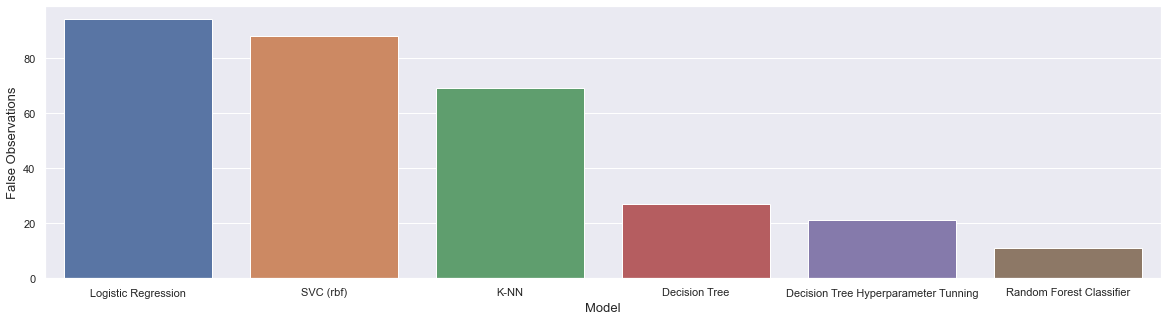

In [107]:
#visulisasi untuk False Potive dan False Negative artinya semakin sedikit/kecil maka semakin bagus modelnya
sum_predict.sort_values(by=(['Accuracy (Testing)']), ascending=True, inplace=True)

f, axe = plt.subplots(1,1, figsize=(20,5))
sns.barplot(x = sum_predict['Model'], y=sum_predict['False Positive'] + sum_predict['False Negative'], ax = axe)
axe.set_xlabel('Model', size=13)
axe.set_ylabel('False Observations', size=13)

plt.show()

##### Validation 

Mengukur Performa model (menggunakan model dari decision Tree yang sudah di Hyperparameter Tunning )

In [108]:
y_pred_proba = dtc_bin_hyper.predict_proba(X_te)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_te), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_te.index

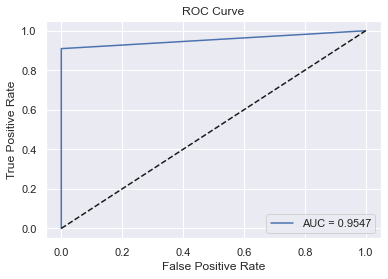

In [109]:
fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

dapat kita lihat score `AUC` yang didapat sudah cukup bagus yaitu `95%` maka dari itu performa dari model yang sudah kita buat sudah bagus, umumnya AUC diatas 70% sudah cukup bagus

##### Melakukan Prediksi pada data inputan lama dan baru 

In [110]:
#mengambil salah satu data untuk memastikan model yang dibangun sudah akurat 
dataset[dataset['quality']== 0]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.99460,3.39,0.47,10.00,0
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.99680,3.36,0.57,9.50,0
16,8.5,0.28,0.56,1.8,0.092,35.0,103.0,0.99690,3.30,0.75,10.50,0
37,8.1,0.38,0.28,2.1,0.066,13.0,30.0,0.99680,3.23,0.73,9.70,0
62,7.5,0.52,0.16,1.9,0.085,12.0,35.0,0.99680,3.38,0.62,9.50,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1541,7.4,0.25,0.29,2.2,0.054,19.0,49.0,0.99666,3.40,0.76,10.90,0
1544,8.4,0.37,0.43,2.3,0.063,12.0,19.0,0.99550,3.17,0.81,11.20,0
1549,7.4,0.36,0.30,1.8,0.074,17.0,24.0,0.99419,3.24,0.70,11.40,0
1555,7.0,0.56,0.17,1.7,0.065,15.0,24.0,0.99514,3.44,0.68,10.55,0


In [111]:
predict_rfc_samp = rfc_bin.predict([[7.4,0.25,0.29,2.2,0.054,19.0,49.0,0.99666,3.40,0.76,10.90]])
#we expect to get quality wine at number 1 (Good)
print("quality of wine :", predict_rfc_samp)

quality of wine : [0]


# Conclusion

By using 2 machine learning methods that we created (`Binary=>("Good", "Bad"`) and `Multiclass=>(3,4,5,6,7,8)`) From the 5 machine learning modeling that we created (`Logistic Regression`, `Stochastic Gradient Descent Classifier`, `Random Forest Classifier`, `Decision Tree Classifier`, and also `K-NN`) to predict the quality of wine, a good enough machine learning model to use or implement in classifying wine quality is to use the `Decision Tree Clasifier` model or `Random Forest Classifier` model.